# Overview of the BGC class composition and diversity

### Prepare the environment

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R
library(tidyverse)
library(vegan)
source("src/create_barplot.R")
bgc_colors <- c('#8c510a','#bf812d','#dfc27d','#f6e8c3',
                '#c7eae5','#80cdc1','#35978f','#01665e',
                '#abdda4','#66c2a5', '#d53e4f','#f46d43',
                '#fdae61','#40004b','#762a83', '#9970ab')

---
# Galapagos dataset
---

This [dataset](https://www.frontiersin.org/articles/10.3389/fmicb.2020.575194/full) consists of 47 metagenomic samples of surface seawater obtained from 26 different sites in the Galapagos archipelago.

In this analysis we will use BGC class abundance composition previously computed utilizing [NAL's bioprospecting pipeline](https://github.com/new-atlantis-labs/bioprospecting).

Let's have a look:

In [5]:
! head data/galapagos/tables/2-bgc_abund.tsv

sample	bgc_class	abund
SRR12042300	NRPS-like	1.03985765124555
SRR12042300	T3PKS	1.05996409335727
SRR12042300	arylpolyene	1.02646592709984
SRR12042300	betalactone	1.21096018735363
SRR12042300	terpene	13.3371987279746
SRR12042301	arylpolyene	1.02824489795918
SRR12042301	betalactone	1.19076643755674
SRR12042301	terpene	8.62387338538816
SRR12042302	NRPS-like	1.06082755723587


And load the data and compute the relative abundances and Shannon diversity.

In [6]:
%%R

TBL <- read_tsv("data/galapagos/tables/2-bgc_abund.tsv", 
                col_names = T,
                show_col_types = F)

TBL_ext <- TBL %>%       
  group_by(sample) %>%
  mutate(abund_rel = 100*abund/sum(abund))

TBL_div <- TBL_ext %>%
  group_by(sample) %>%
  summarize(shannon = diversity(abund_rel))

Now we can create the plot. Given that this turns out to be a long and complex command in [ggplot2](https://ggplot2.tidyverse.org/), we created an R function for this task.

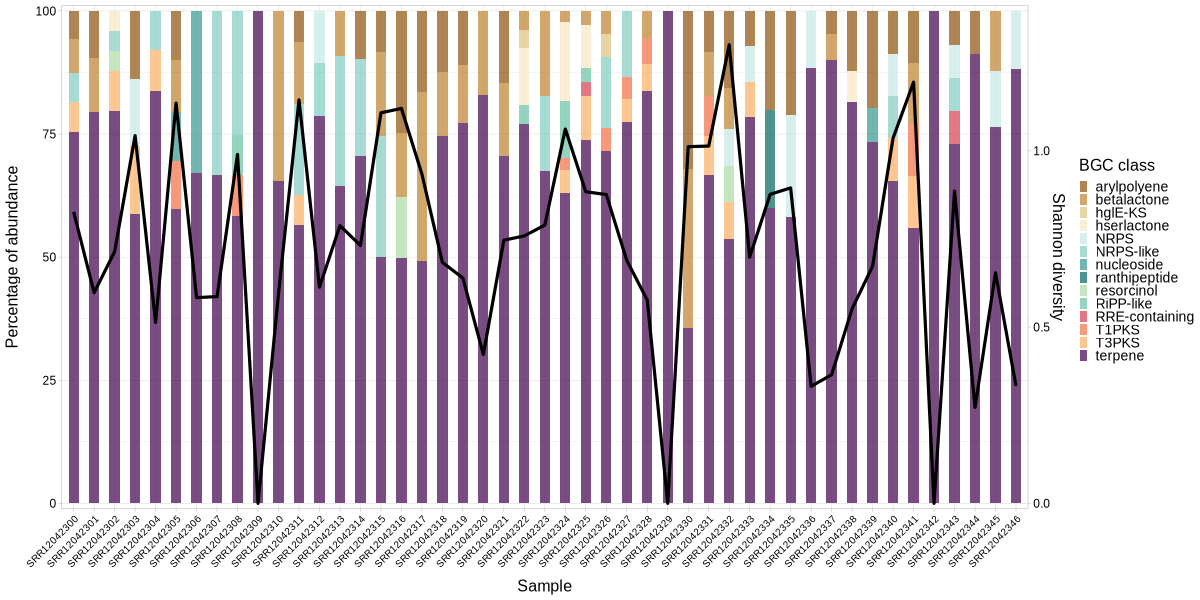

In [7]:
%%R -w 1200 -h 600
barplot <- create_barplot(TBL_ext, TBL_div, bgc_colors, text_size = 12)
barplot

# Classification of BGC products into bioactive compound classes

In [ ]:
import pandas as pd

df = pd.read_csv("data/galapagos/tables/2-bgc_abund.tsv", sep="\t")